# Comparison --predictalign and --predictalignnw

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import csv
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [49]:
def append_traces(paths, threshold=0):
    # Array to store the values
    y_label = []
    y_pred = []
    for path in paths:
        pred = []
        labels = []
        with open(path, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)
            
            # Iterate over each row in the CSV
            for row in csv_reader:
                # Append the value of the ' norm-nw-score' column to the array
                # Strip any leading/trailing whitespace from the column name
                pred.append(float(row[' norm-nw-score'].strip()))
                
                # Determine the label for this path
                
                # Append the labels and predictions to the main lists
        y_label.extend(labels)
        # Determine the label for this path
        if "abnorm" in path:
            label = 0
        else:
            label = 1
        # Append the labels and predictions to the main lists
        y_label.extend([label] * len(pred))
        y_pred.extend(pred)

    return y_label, y_pred



In [53]:
def get_prediction(paths, threshold=0):
    # Array to store the values
    y_label = []
    y_pred = []
    for path in paths:
        pred = []
        labels = []
        temp = 0

        with open(path, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)
            # Iterate over each row in the CSV
            for row in csv_reader:
                # Append the value of the ' norm-nw-score' column to the array
                # Strip any leading/trailing whitespace from the column name
                if row[' sum scores'].strip() == "-inf" or row[' sum scores'].strip()=="0":
                    pred.append(0)
                    temp+=1
                # pred.append(float(row[' sum scores'].strip()))
                else:
                    pred.append(1)
                # Determine the label for this path
                
                # Append the labels and predictions to the main lists
        y_label.extend(labels)
        # Determine the label for this path
        if "abnorm" in path:
            label = 0
        else:
            label = 1
        # Append the labels and predictions to the main lists
        y_label.extend([label] * len(pred))
        y_pred.extend(pred)

    return y_label, y_pred

## Predict, sinkcount=5

### ROC curve

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

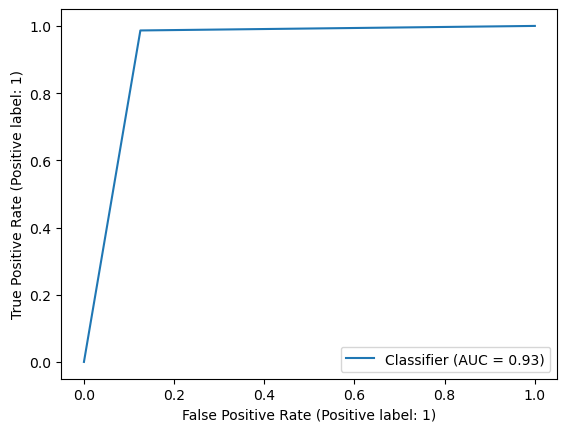

In [94]:
# Path to your CSV file
csv_file_paths_5_1 = ['./hdfs_aic/sinks_5/aic5_predict_abnormal.csv','./hdfs_aic/sinks_5/aic5_predict_normal.csv', './hdfs_aic/sinks_5/aic5_predict_train.csv']
y_label_5_1, y_pred_5_1 = get_prediction(csv_file_paths_5_1)
print(y_label_5_1)
print(y_pred_5_1)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_5_1, y_pred_5_1)
plt.show()

### Confusion matrix

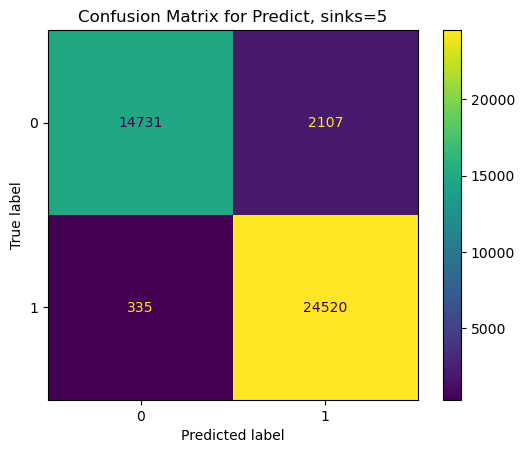

F1 Score: 0.9526


In [105]:

cm_5_1 = confusion_matrix(y_label_5_1, y_pred_5_1)
# Display the confusion matrix
cm_5_1_display = ConfusionMatrixDisplay(confusion_matrix=cm_5_1, display_labels=[0, 1])
cm_5_1_display.plot()
plt.title("Confusion Matrix for Predict, sinks=5")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_5_1, y_pred_5_1)

print(f"F1 Score: {f1:.4f}")

## Predictalign, sinkcount=5

### ROC curves

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

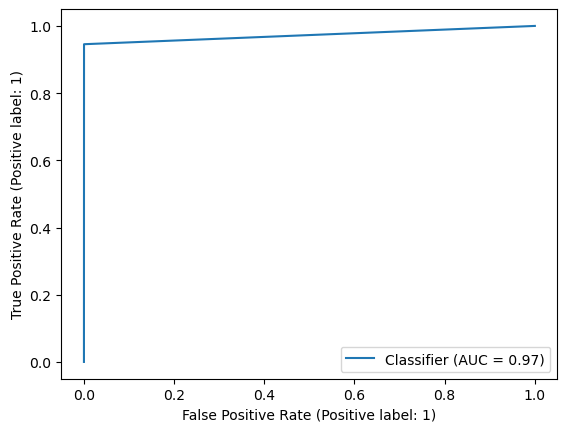

In [54]:
# Path to your CSV file
csv_file_paths_5 = ['./hdfs_aic/sinks_5/aic5_predictalign_abnormal.csv','./hdfs_aic/sinks_5/aic5_predictalign_normal.csv', './hdfs_aic/sinks_5/aic5_predictalign_train.csv']
y_label_5, y_pred_5 = get_prediction(csv_file_paths_5)
print(y_label_5)
print(y_pred_5)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_5, y_pred_5)
plt.show()

### Predictalignnw-static, sinkcount=300

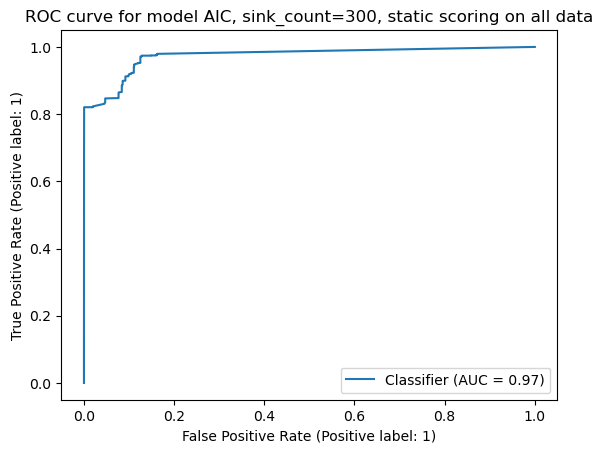

In [47]:
# Path to your CSV file
csv_file_paths_static300 = ['./hdfs_aic/sinks_300/3/aic300_static_normal_0.953033.csv', './hdfs_aic/sinks_300/3/aic300_static_abnormal_0.147658.csv', './hdfs_aic/sinks_300/3/aic300_static_train_0.95499.csv']

y_label_static300, y_pred_static300 = append_traces(csv_file_paths_static300)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300)
plt.title("ROC curve for model AIC, sink_count=300, static scoring on all data")
plt.show()

## Comparison, sinkcount=5 and predictalignnw-static sinkcount=300

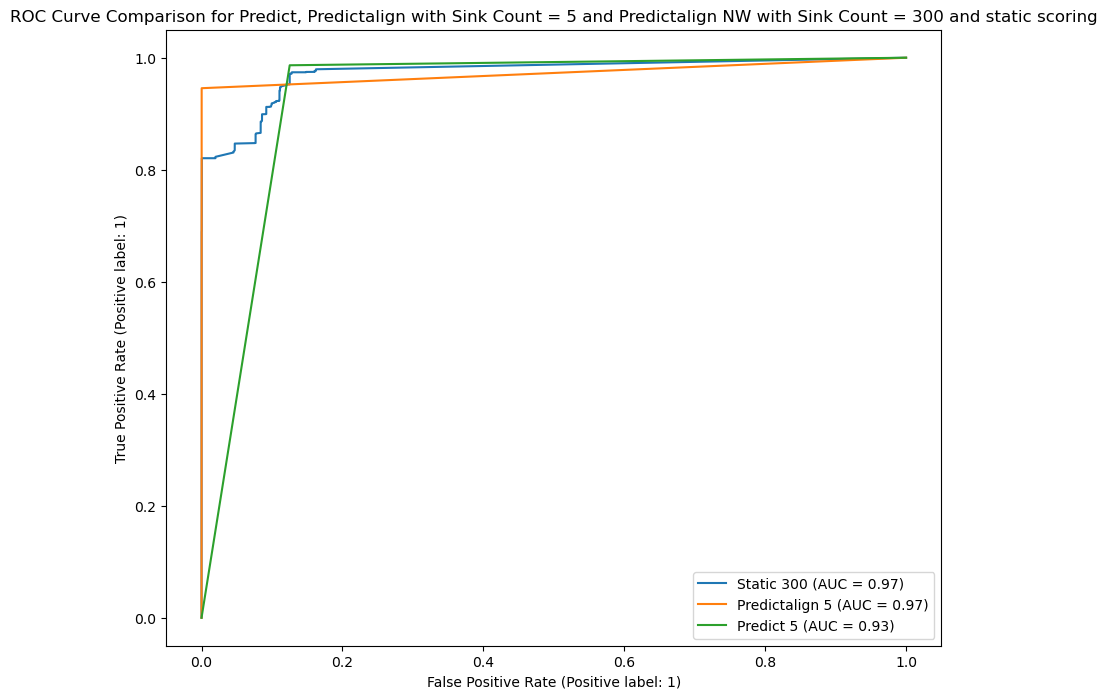

In [95]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300, name='Static 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_5, y_pred_5, name='Predictalign 5',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_5_1, y_pred_5_1, name='Predict 5',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 5 and Predictalign NW with Sink Count = 300 and static scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

## Predictalign, sinkcount=5

### Confusion matrix and F1-score

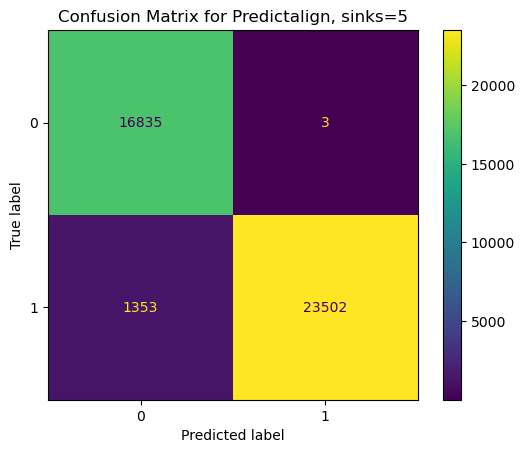

F1 Score: 0.9720


In [63]:

cm_5 = confusion_matrix(y_label_5, y_pred_5)
# Display the confusion matrix
cm_5_display = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=[0, 1])
cm_5_display.plot()
plt.title("Confusion Matrix for Predictalign, sinks=5")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_5, y_pred_5)

print(f"F1 Score: {f1:.4f}")

## Predictalignnw-static, sinkcount=300

In [60]:
# Load the CSV file
csv_file_path = 'hdfs_aic/sinks_300/3/aic300_static_train_0.95499.csv'  # Replace with your actual file path
data = pd.read_csv(csv_file_path)

# Specify the column you're interested in
column_name = ' norm-nw-score'  # Replace with your actual column name

# Extract the column
column_data = data[column_name]

# Drop NaN values if any
column_data = column_data.dropna()

# Calculate the 25th percentile (lower quartile)
lower_quartile = column_data.quantile(0.25)

# Filter values between the minimum value and Q1
first_quartile_data = column_data[(column_data > column_data.min()) & (column_data <= lower_quartile)]

# Get the minimum value in the first quartile
min_first_quartile_value = first_quartile_data.max()


print("The lowest value in the first quartile is:", min_first_quartile_value)
print("The lowest non-zero value is:", first_quartile_data.min()) # 0.842342

The lowest value in the first quartile is: 0.947368
The lowest non-zero value is: 0.842342


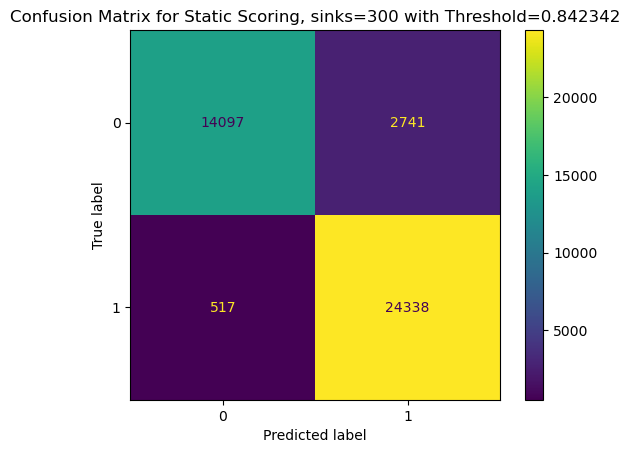

F1 Score: 0.9373


In [61]:
# Convert continuous predictions to binary predictions
y_pred_static300 = np.array(y_pred_static300)
y_pred_static300_binary = (y_pred_static300 >= first_quartile_data.min()).astype(int)

cm_static300 = confusion_matrix(y_label_static300, y_pred_static300_binary)
# Display the confusion matrix
cm_static300_display = ConfusionMatrixDisplay(confusion_matrix=cm_static300, display_labels=[0, 1])
cm_static300_display.plot()
plt.title("Confusion Matrix for Static Scoring, sinks=300 with Threshold=0.842342")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_static300, y_pred_static300_binary)

print(f"F1 Score: {f1:.4f}")

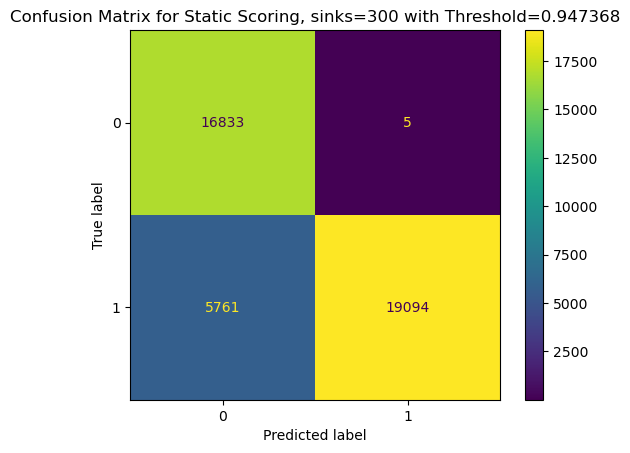

F1 Score: 0.8688


In [62]:
# Convert continuous predictions to binary predictions
y_pred_static300 = np.array(y_pred_static300)
y_pred_static300_binary = (y_pred_static300 >= min_first_quartile_value).astype(int)

cm_static300 = confusion_matrix(y_label_static300, y_pred_static300_binary)
# Display the confusion matrix
cm_static300_display = ConfusionMatrixDisplay(confusion_matrix=cm_static300, display_labels=[0, 1])
cm_static300_display.plot()
plt.title("Confusion Matrix for Static Scoring, sinks=300 with Threshold=0.947368")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_static300, y_pred_static300_binary)

print(f"F1 Score: {f1:.4f}")

## Predictalignnw-linear, sinkcount=300

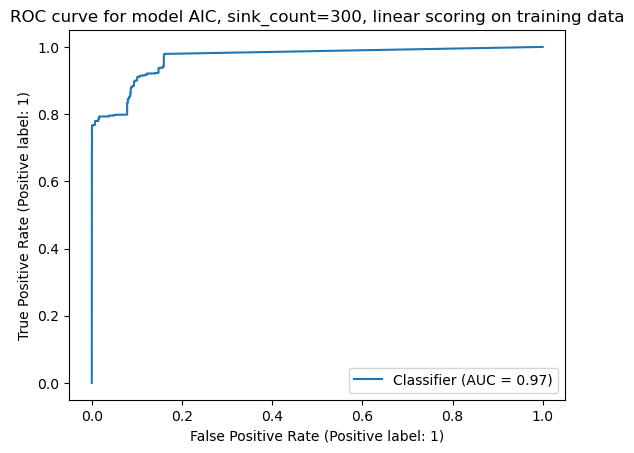

In [55]:
# Path to your CSV file
csv_file_paths_linear300 = ['./hdfs_aic/sinks_300/3/aic300_linear_abnormal_0.134126.csv', './hdfs_aic/sinks_300/3/aic300_linear_normal_0.929921.csv', './hdfs_aic/sinks_300/3/aic300_linear_train_0.932214.csv']

y_label_linear300, y_pred_linear300 = append_traces(csv_file_paths_linear300)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300)
plt.title("ROC curve for model AIC, sink_count=300, linear scoring on training data")
plt.show()

## Comparison, sinkcount=10 and predictalignnw-linear, sinkcount=300

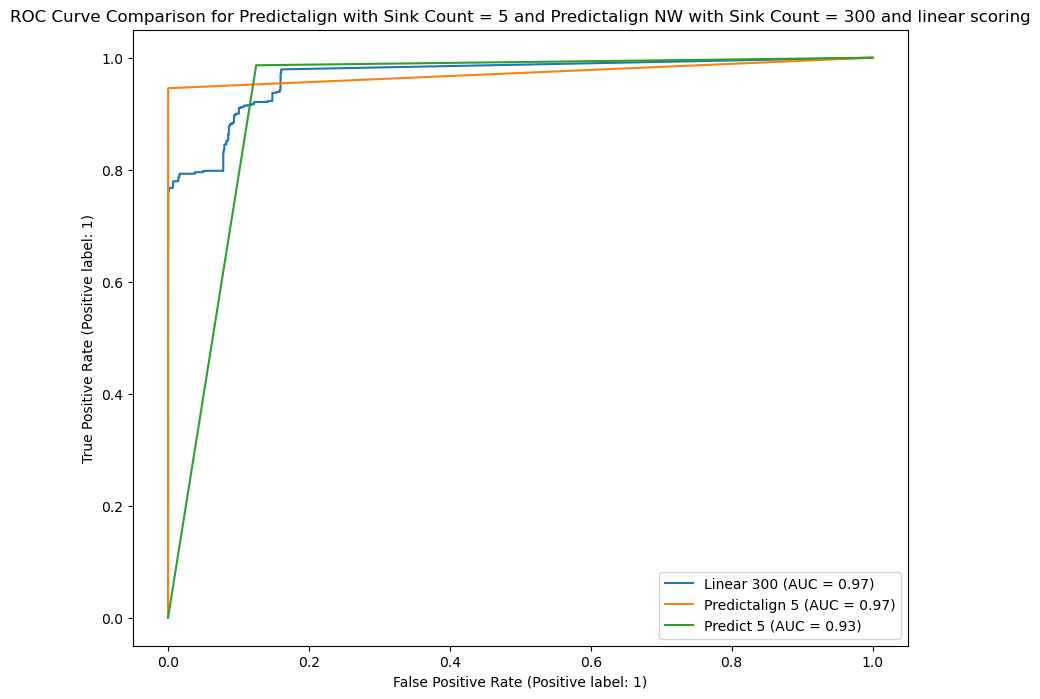

In [96]:

# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300, name='Linear 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_5, y_pred_5, name='Predictalign 5',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_5_1, y_pred_5_1, name='Predict 5',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predictalign with Sink Count = 5 and Predictalign NW with Sink Count = 300 and linear scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

## Predictalignnw-linear, sinkcount=300

### Confusion matrices and F1-score

In [64]:
# Load the CSV file
csv_file_path = 'hdfs_aic/sinks_300/3/aic300_linear_train_0.932214.csv'  # Replace with your actual file path
data = pd.read_csv(csv_file_path)

# Specify the column you're interested in
column_name = ' norm-nw-score'  # Replace with your actual column name

# Extract the column
column_data = data[column_name]

# Drop NaN values if any
column_data = column_data.dropna()

# Calculate the 25th percentile (lower quartile)
lower_quartile = column_data.quantile(0.25)

# Filter values between the minimum value and Q1
first_quartile_data = column_data[(column_data > column_data.min()) & (column_data <= lower_quartile)]

# Get the minimum value in the first quartile
min_first_quartile_value = first_quartile_data.max()


print("The lowest value in the first quartile is:", min_first_quartile_value)
print("The lowest non-zero value is:", first_quartile_data.min()) 

The lowest value in the first quartile is: 0.929825
The lowest non-zero value is: 0.361111


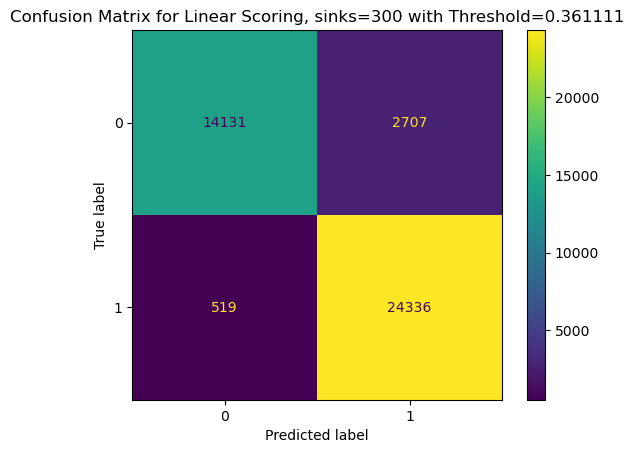

F1 Score: 0.9378


In [65]:
# Convert continuous predictions to binary predictions
y_pred_linear300 = np.array(y_pred_linear300)
y_pred_linear300_binary = (y_pred_linear300 >= first_quartile_data.min()).astype(int)

cm_linear300 = confusion_matrix(y_label_linear300, y_pred_linear300_binary)
# Display the confusion matrix
cm_linear300_display = ConfusionMatrixDisplay(confusion_matrix=cm_linear300, display_labels=[0, 1])
cm_linear300_display.plot()
plt.title("Confusion Matrix for Linear Scoring, sinks=300 with Threshold=0.361111")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_linear300, y_pred_linear300_binary)

print(f"F1 Score: {f1:.4f}")

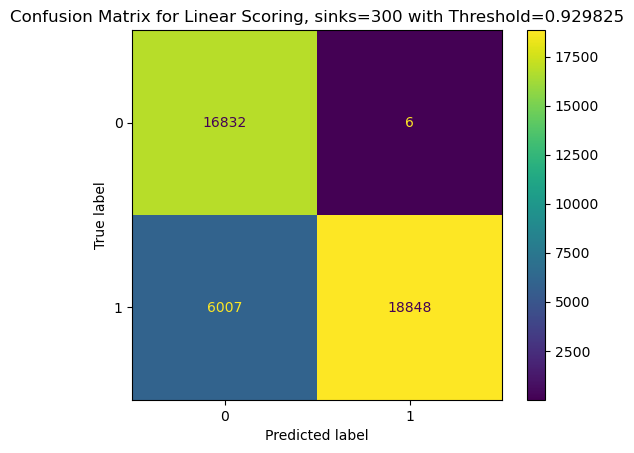

F1 Score: 0.8624


In [66]:
# Convert continuous predictions to binary predictions
y_pred_linear300 = np.array(y_pred_linear300)
y_pred_linear300_binary = (y_pred_linear300 >= min_first_quartile_value).astype(int)

cm_linear300 = confusion_matrix(y_label_linear300, y_pred_linear300_binary)
# Display the confusion matrix
cm_linear300_display = ConfusionMatrixDisplay(confusion_matrix=cm_linear300, display_labels=[0, 1])
cm_linear300_display.plot()
plt.title("Confusion Matrix for Linear Scoring, sinks=300 with Threshold=0.929825")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_linear300, y_pred_linear300_binary)

print(f"F1 Score: {f1:.4f}")


## Predict, sinkcount=10

### ROC curve

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

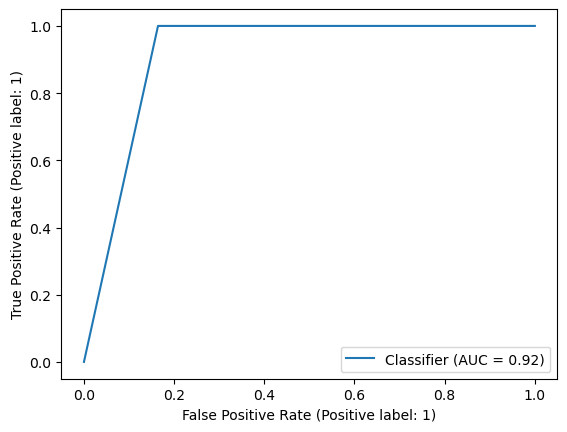

In [98]:
# Path to your CSV file
csv_file_paths_10_1 = ['./hdfs_aic/sinks_10/aic10_predict_abnormal.csv','./hdfs_aic/sinks_10/aic10_predict_normal.csv', './hdfs_aic/sinks_10/aic10_predict_train.csv']
y_label_10_1, y_pred_10_1 = get_prediction(csv_file_paths_10_1)
print(y_label_10_1)
print(y_pred_10_1)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_10_1, y_pred_10_1)
plt.show()

### Confusion matrix

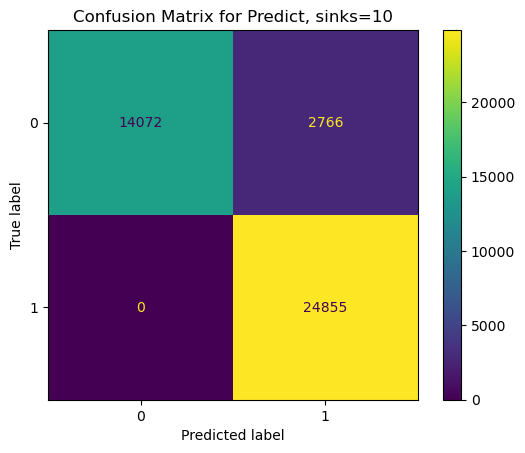

F1 Score: 0.9473


In [104]:

cm_10_1 = confusion_matrix(y_label_10_1, y_pred_10_1)
# Display the confusion matrix
cm_10_1_display = ConfusionMatrixDisplay(confusion_matrix=cm_10_1, display_labels=[0, 1])
cm_10_1_display.plot()
plt.title("Confusion Matrix for Predict, sinks=10")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_10_1, y_pred_10_1)

print(f"F1 Score: {f1:.4f}")

## Predictalign, sinkcount=10

### ROC Curves

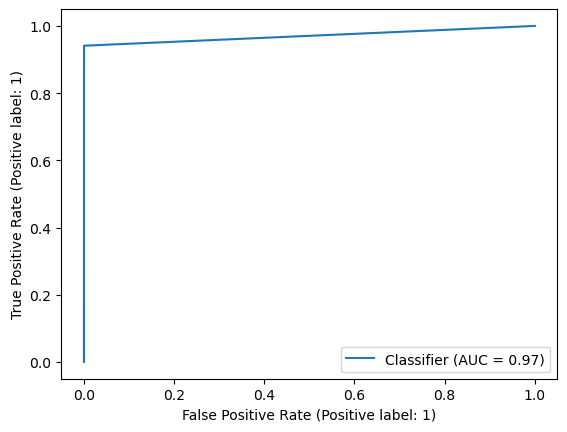

In [73]:
# Path to your CSV file
csv_file_paths_10 = ['./hdfs_aic/sinks_10/aic10_predictalign_abnormal.csv','./hdfs_aic/sinks_10/aic10_predictalign_normal.csv', './hdfs_aic/sinks_10/aic10_predictalign_train.csv']
# Display the ROC curve
plt.show()
y_label_10, y_pred_10 = get_prediction(csv_file_paths_10)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_10, y_pred_10)
plt.show()

## Comparison sinkcount=10 and predictalignnw-static sinkcount=300

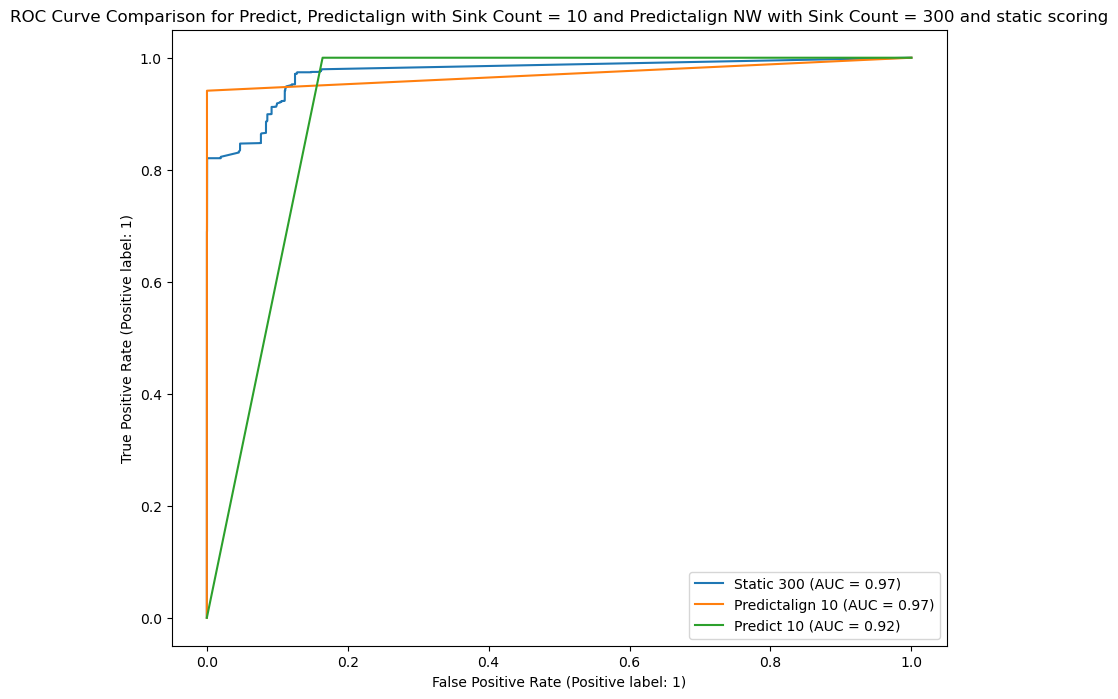

In [100]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300, name='Static 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_10, y_pred_10, name='Predictalign 10',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_10_1, y_pred_10_1, name='Predict 10',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 10 and Predictalign NW with Sink Count = 300 and static scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

### Confusion matrix, predictalign, sinkcount=10

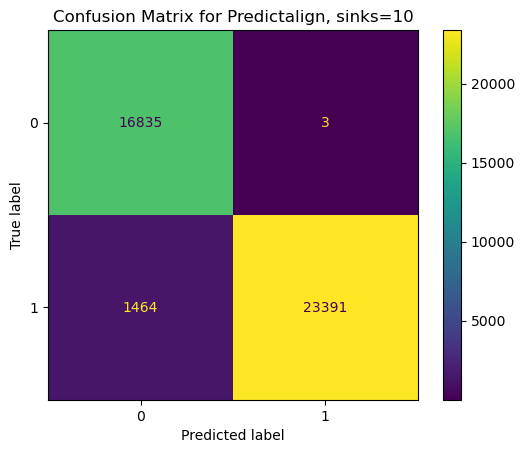

F1 Score: 0.9696


In [75]:

cm_10 = confusion_matrix(y_label_10, y_pred_10)
# Display the confusion matrix
cm_10_display = ConfusionMatrixDisplay(confusion_matrix=cm_10, display_labels=[0, 1])
cm_10_display.plot()
plt.title("Confusion Matrix for Predictalign, sinks=10")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_10, y_pred_10)

print(f"F1 Score: {f1:.4f}")

## Comparison, sinkcount=10 and predictalignnw, sinkcount=300, linear scoring

### ROC curves


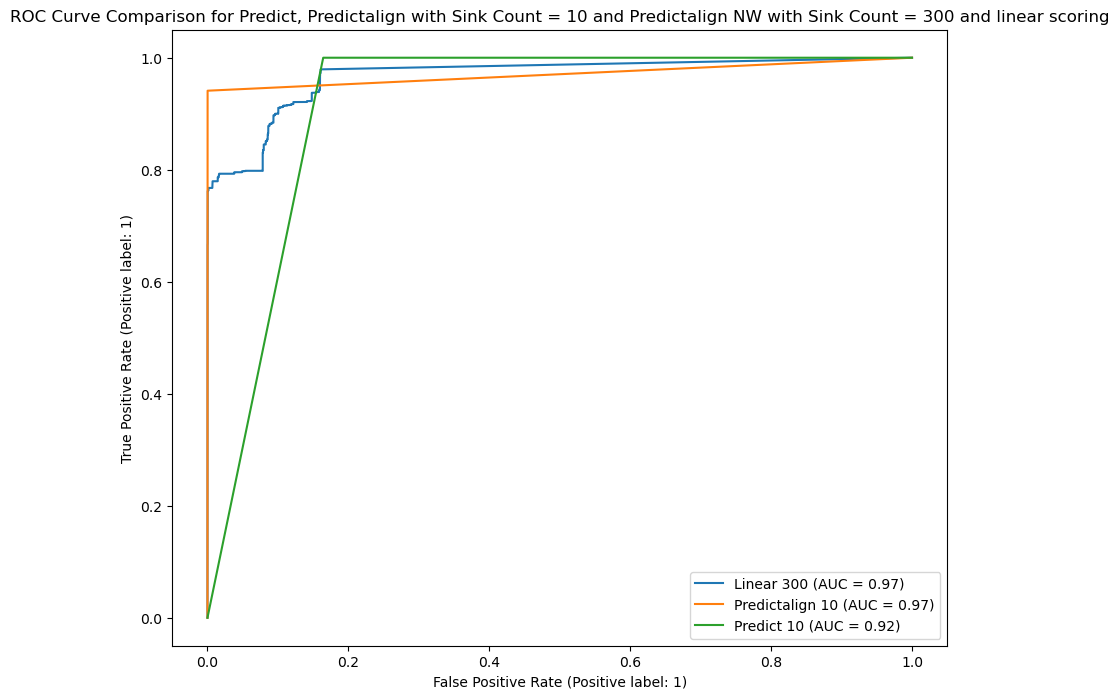

In [101]:

# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300, name='Linear 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_10, y_pred_10, name='Predictalign 10',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_10_1, y_pred_10_1, name='Predict 10',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 10 and Predictalign NW with Sink Count = 300 and linear scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

## Predict sinkcount=50

### ROC curve

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

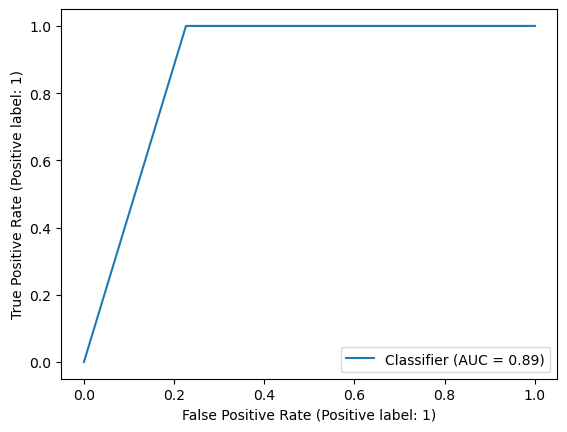

In [102]:
# Path to your CSV file
csv_file_paths_50_1 = ['./hdfs_aic/sinks_50/aic50_predict_abnormal.csv','./hdfs_aic/sinks_50/aic50_predict_normal.csv', './hdfs_aic/sinks_50/aic50_predict_train.csv']
y_label_50_1, y_pred_50_1 = get_prediction(csv_file_paths_50_1)
print(y_label_50_1)
print(y_pred_50_1)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_50_1, y_pred_50_1)
plt.show()

### Confusion matrix

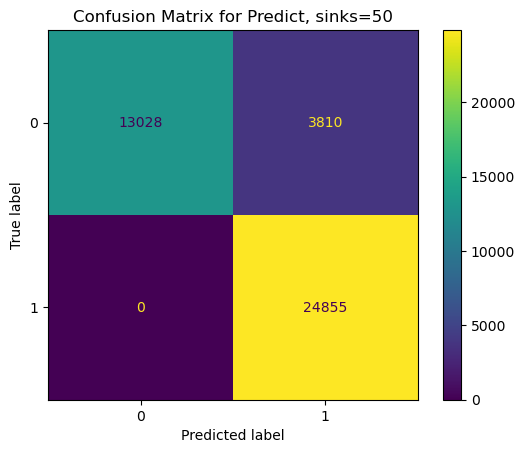

F1 Score: 0.9288


In [103]:

cm_50_1 = confusion_matrix(y_label_50_1, y_pred_50_1)
# Display the confusion matrix
cm_50_1_display = ConfusionMatrixDisplay(confusion_matrix=cm_50_1, display_labels=[0, 1])
cm_50_1_display.plot()
plt.title("Confusion Matrix for Predict, sinks=50")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_50_1, y_pred_50_1)

print(f"F1 Score: {f1:.4f}")

## Predictalign, sinkcount=50

### ROC Curve

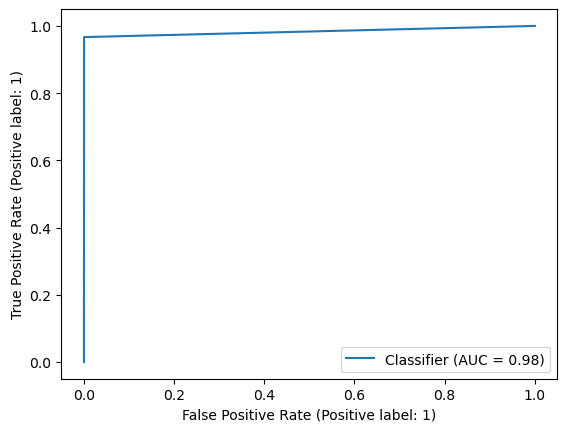

In [77]:
# Path to your CSV file
csv_file_paths_50 = ['./hdfs_aic/sinks_50/aic50_predictalign_abnormal.csv','./hdfs_aic/sinks_50/aic50_predictalign_normal.csv', './hdfs_aic/sinks_50/aic50_predictalign_train.csv']
# Display the ROC curve
plt.show()
y_label_50, y_pred_50 = get_prediction(csv_file_paths_50)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_50, y_pred_50)
plt.show()

## Comparison, sinkcount=50, predictalignnw-static sinkcount=300

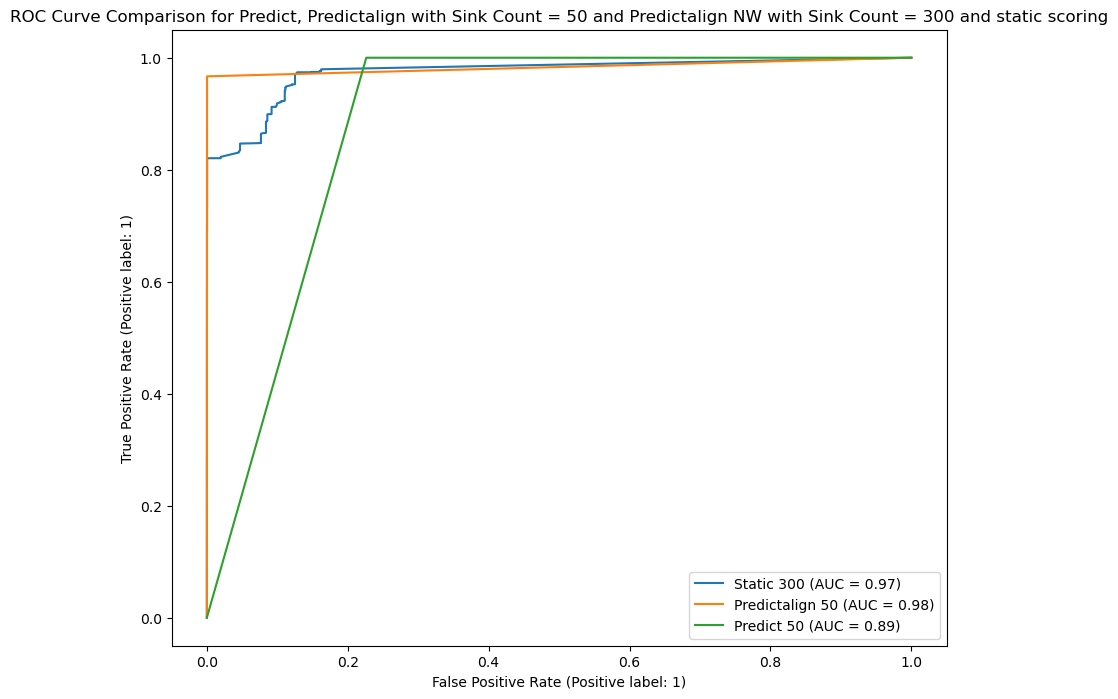

In [118]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300, name='Static 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_50, y_pred_50, name='Predictalign 50',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_50_1, y_pred_50_1, name='Predict 50',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 50 and Predictalign NW with Sink Count = 300 and static scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

### Confusion matrix, predictalign, sinkcount=50

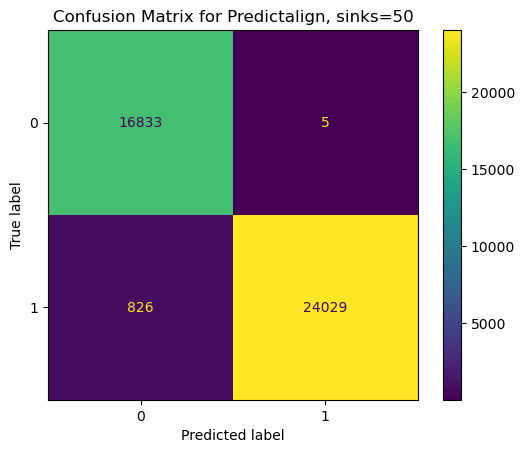

F1 Score: 0.9830


In [81]:

cm_50 = confusion_matrix(y_label_50, y_pred_50)
# Display the confusion matrix
cm_50_display = ConfusionMatrixDisplay(confusion_matrix=cm_50, display_labels=[0, 1])
cm_50_display.plot()
plt.title("Confusion Matrix for Predictalign, sinks=50")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_50, y_pred_50)

print(f"F1 Score: {f1:.4f}")

## Comparison, sinkcount=50 and predictalignnw-linear, sinkcount=300

### ROC curves

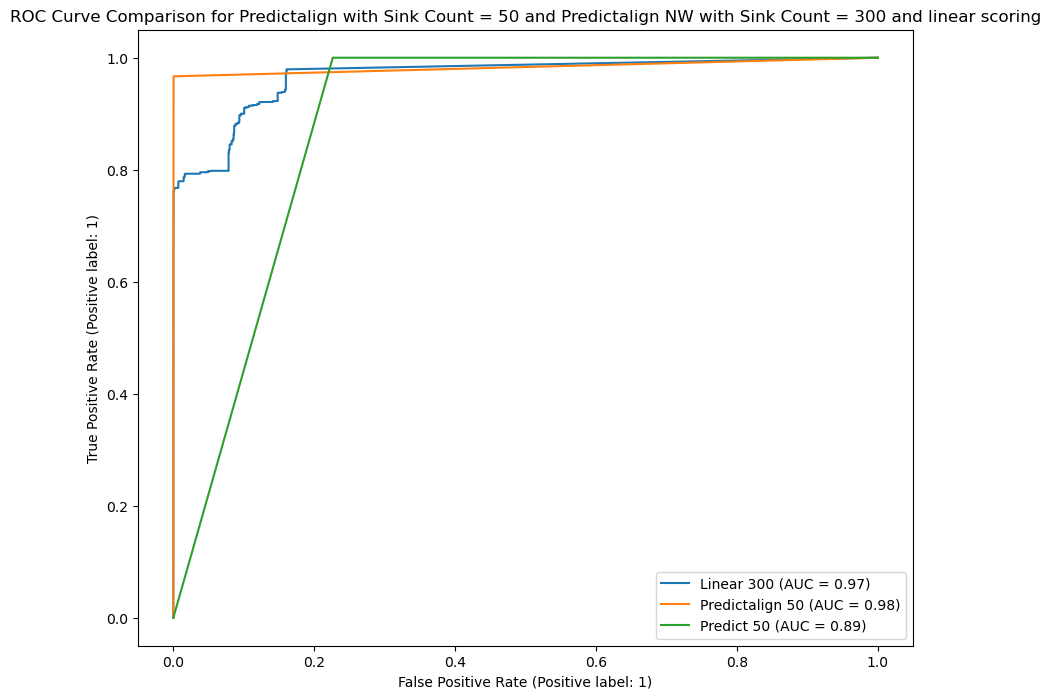

In [119]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300, name='Linear 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_50, y_pred_50, name='Predictalign 50',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_50_1, y_pred_50_1, name='Predict 50',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predictalign with Sink Count = 50 and Predictalign NW with Sink Count = 300 and linear scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

## Predict sinkcount=100

### ROC Curve

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

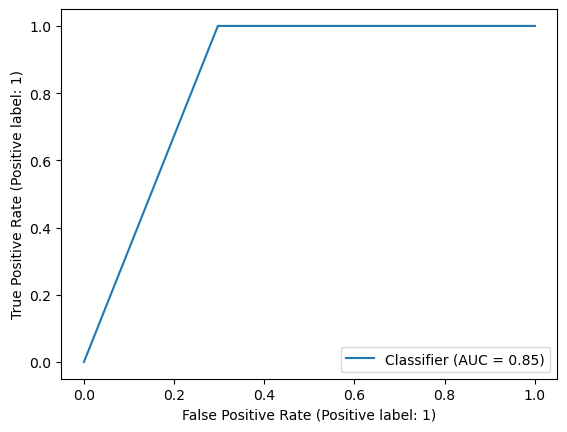

In [108]:
# Path to your CSV file
csv_file_paths_100_1 = ['./hdfs_aic/sinks_100/aic100_predict_abnormal.csv','./hdfs_aic/sinks_100/aic100_predict_normal.csv', './hdfs_aic/sinks_100/aic100_predict_train.csv']
y_label_100_1, y_pred_100_1 = get_prediction(csv_file_paths_100_1)
print(y_label_100_1)
print(y_pred_100_1)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_100_1, y_pred_100_1)
plt.show()

### Confusion matrix

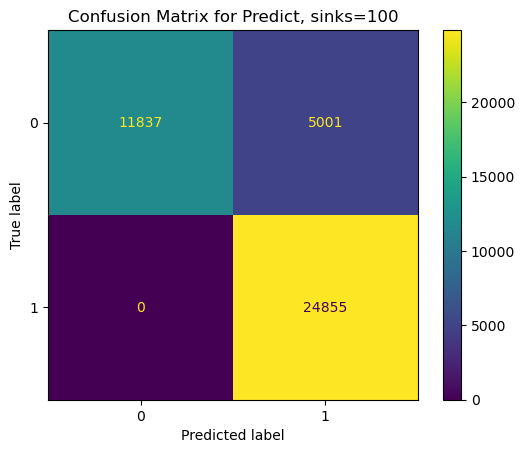

F1 Score: 0.9086


In [109]:

cm_100_1 = confusion_matrix(y_label_100_1, y_pred_100_1)
# Display the confusion matrix
cm_100_1_display = ConfusionMatrixDisplay(confusion_matrix=cm_100_1, display_labels=[0, 1])
cm_100_1_display.plot()
plt.title("Confusion Matrix for Predict, sinks=100")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_100_1, y_pred_100_1)

print(f"F1 Score: {f1:.4f}")

## Predictalign, sinkcount=100

### ROC curves

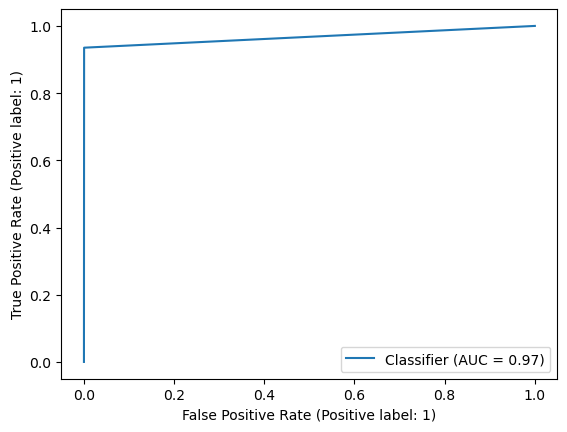

In [83]:
# Path to your CSV file
csv_file_paths_100 = ['./hdfs_aic/sinks_100/aic100_predictalign_abnormal.csv','./hdfs_aic/sinks_100/aic100_predictalign_normal.csv', './hdfs_aic/sinks_100/aic100_predictalign_train.csv']
# Display the ROC curve
plt.show()
y_label_100, y_pred_100 = get_prediction(csv_file_paths_100)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_100, y_pred_100)
plt.show()

## Comparison, sinkcount=100, predictalignnw-static, sinkcount=300

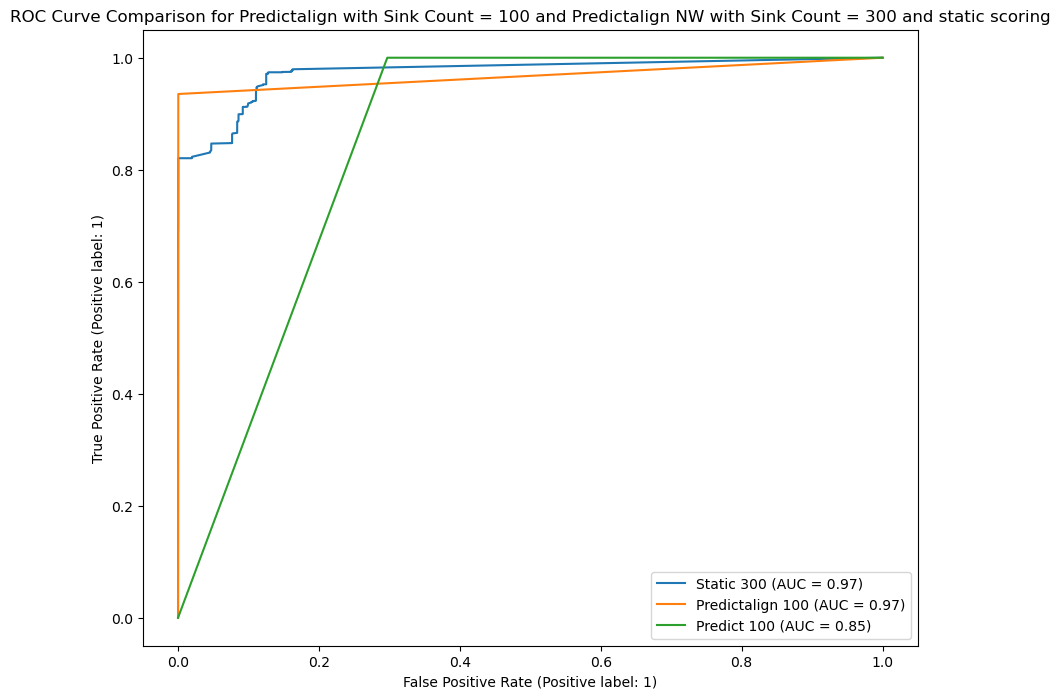

In [120]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300, name='Static 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_100, y_pred_100, name='Predictalign 100',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_100_1, y_pred_100_1, name='Predict 100',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predictalign with Sink Count = 100 and Predictalign NW with Sink Count = 300 and static scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

### Confusion matrix, predictalign, sinkcount=100

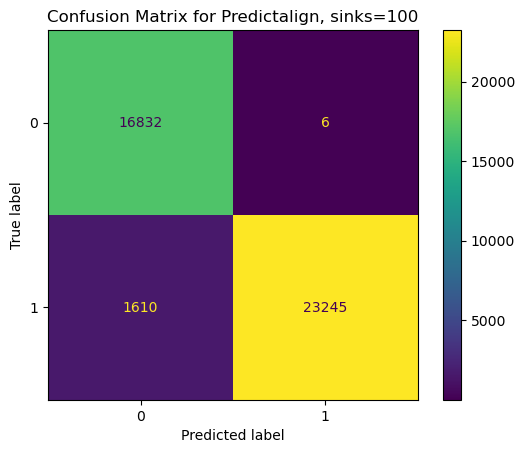

F1 Score: 0.9664


In [86]:

cm_100 = confusion_matrix(y_label_100, y_pred_100)
# Display the confusion matrix
cm_100_display = ConfusionMatrixDisplay(confusion_matrix=cm_100, display_labels=[0, 1])
cm_100_display.plot()
plt.title("Confusion Matrix for Predictalign, sinks=100")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_100, y_pred_100)

print(f"F1 Score: {f1:.4f}")

## Comparison, sinkcount=100 and predictalignnw-linear, sinkcount=300

### ROC curves

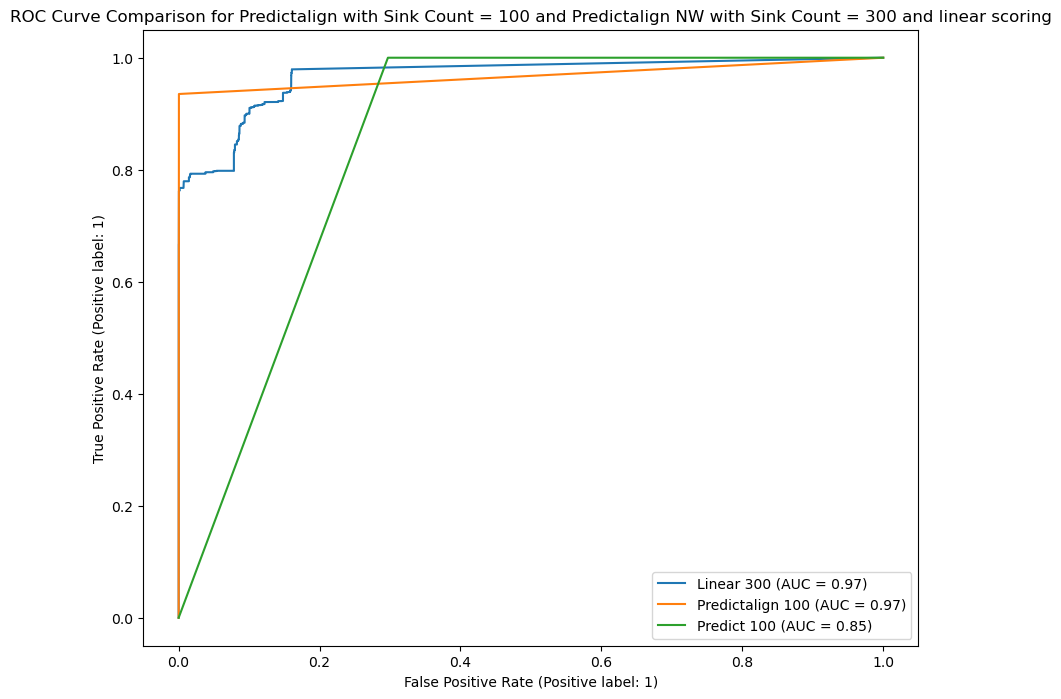

In [121]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300, name='Linear 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_100, y_pred_100, name='Predictalign 100',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_100_1, y_pred_100_1, name='Predict 100',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predictalign with Sink Count = 100 and Predictalign NW with Sink Count = 300 and linear scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

## Predict sinkcount=300, static 

### ROC Curve

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

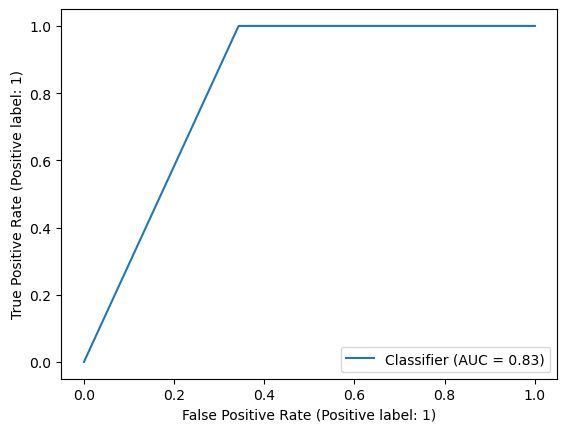

In [110]:
# Path to your CSV file
csv_file_paths_300_1 = ['./hdfs_aic/sinks_300/aic300_predict_abnormal.csv','./hdfs_aic/sinks_300/aic300_predict_normal.csv', './hdfs_aic/sinks_300/aic300_predict_train.csv']
y_label_300_1, y_pred_300_1 = get_prediction(csv_file_paths_300_1)
print(y_label_300_1)
print(y_pred_300_1)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_300_1, y_pred_300_1)
plt.show()

### Confusion matrix

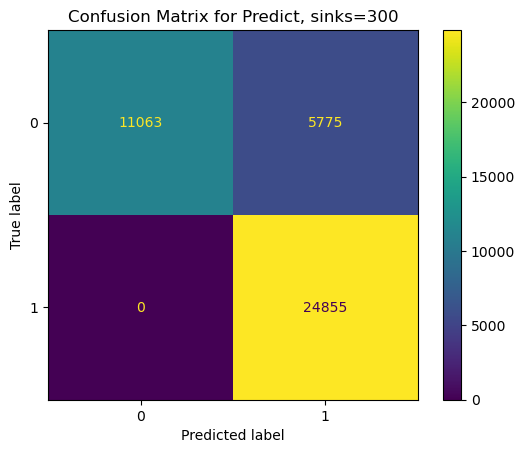

F1 Score: 0.8959


In [111]:

cm_300_1 = confusion_matrix(y_label_300_1, y_pred_300_1)
# Display the confusion matrix
cm_300_1_display = ConfusionMatrixDisplay(confusion_matrix=cm_300_1, display_labels=[0, 1])
cm_300_1_display.plot()
plt.title("Confusion Matrix for Predict, sinks=300")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_300_1, y_pred_300_1)

print(f"F1 Score: {f1:.4f}")

## Predictalign, sinkcount=300

### ROC curves

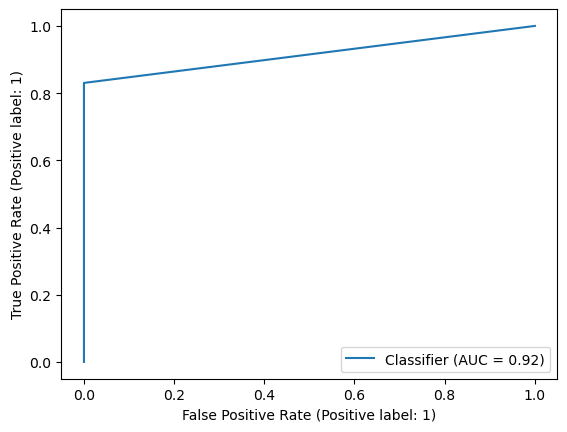

In [89]:
# Path to your CSV file
csv_file_paths_300 = ['./hdfs_aic/sinks_300/aic300_predictalign_abnormal.csv','./hdfs_aic/sinks_300/aic300_predictalign_normal.csv', './hdfs_aic/sinks_300/aic300_predictalign_train.csv']
# Display the ROC curve
plt.show()
y_label_300, y_pred_300 = get_prediction(csv_file_paths_300)
# Display the ROC curve
RocCurveDisplay.from_predictions(y_label_300, y_pred_300)
plt.show()

## Comparison, sinkcount=300, predictalignnw-static, sinkcount=300

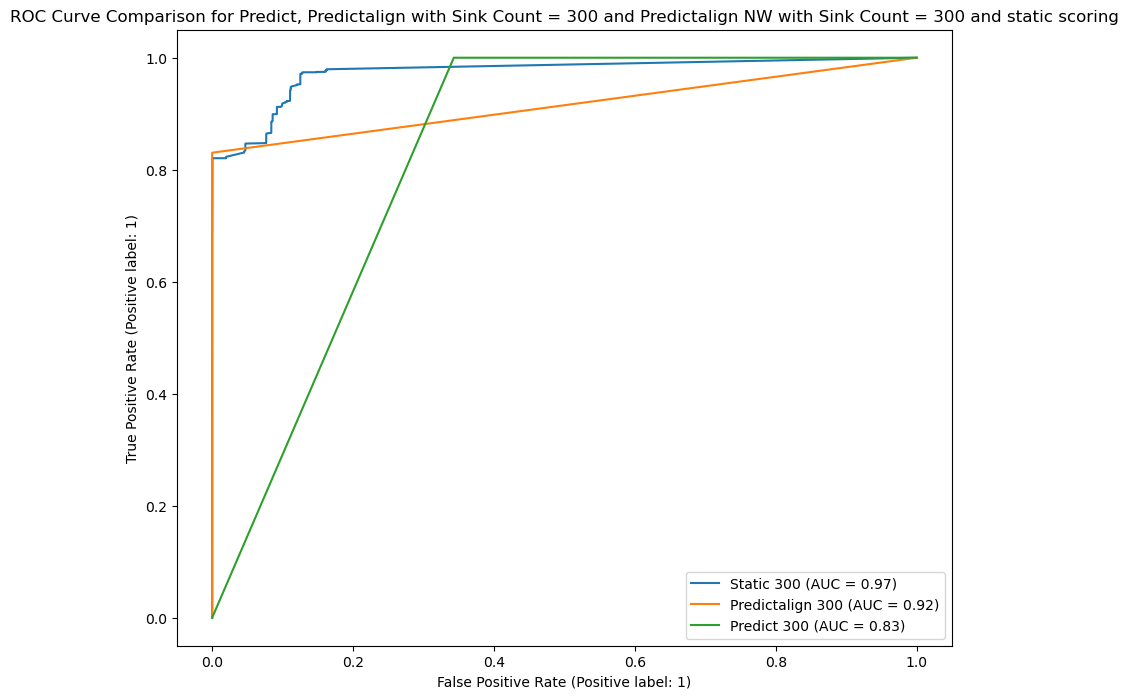

In [116]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_static300, y_pred_static300, name='Static 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_300, y_pred_300, name='Predictalign 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_300_1, y_pred_300_1, name='Predict 300',ax=plt.gca())


# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 300 and Predictalign NW with Sink Count = 300 and static scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()

### Confusion matrix

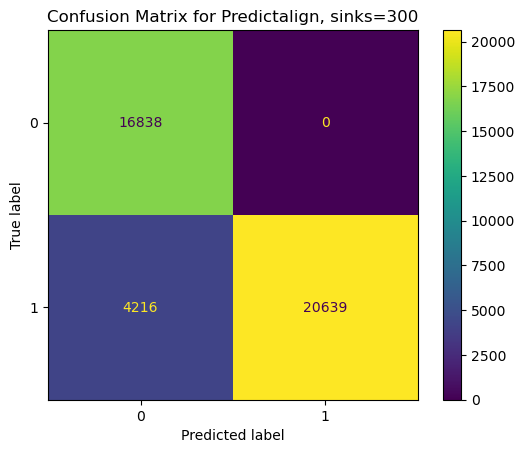

F1 Score: 0.9073


In [92]:

cm_300 = confusion_matrix(y_label_300, y_pred_300)
# Display the confusion matrix
cm_300_display = ConfusionMatrixDisplay(confusion_matrix=cm_300, display_labels=[0, 1])
cm_300_display.plot()
plt.title("Confusion Matrix for Predictalign, sinks=300")
plt.show()

# Calculate the F1 score
f1 = f1_score(y_label_300, y_pred_300)

print(f"F1 Score: {f1:.4f}")

## Comparison sinkcount=300 and predictalignnw-linear, sinkcount=300

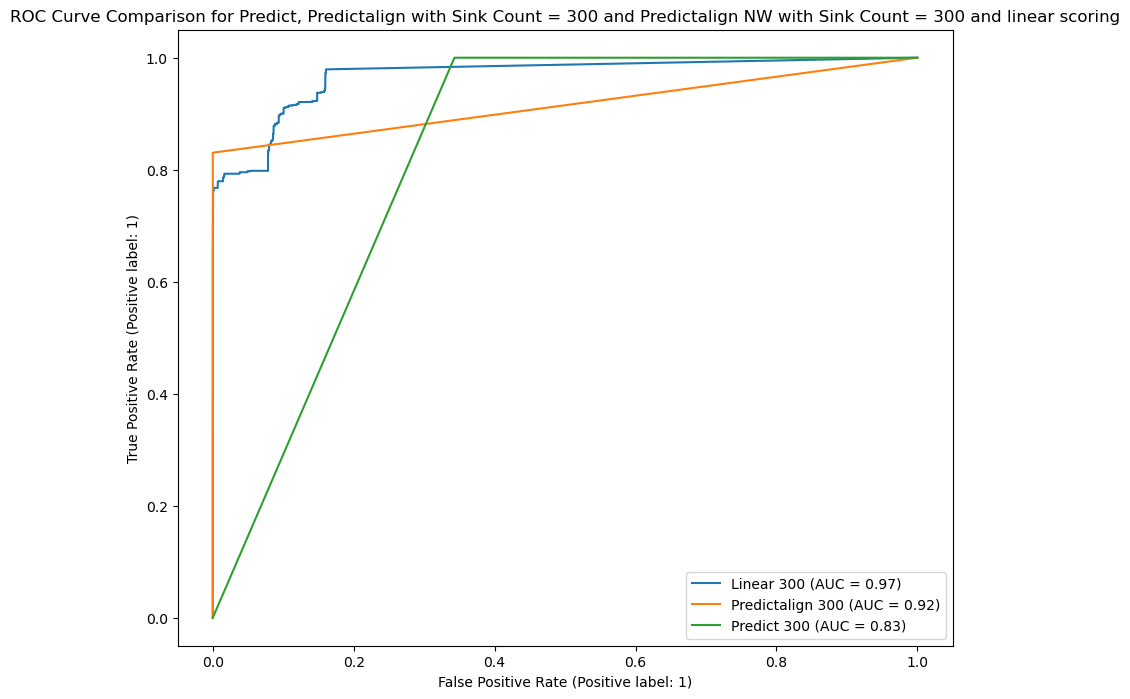

In [117]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_label_linear300, y_pred_linear300, name='Linear 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_300, y_pred_300, name='Predictalign 300',ax=plt.gca())
RocCurveDisplay.from_predictions(y_label_300_1, y_pred_300_1, name='Predict 300',ax=plt.gca())

# Add title and legend
plt.title("ROC Curve Comparison for Predict, Predictalign with Sink Count = 300 and Predictalign NW with Sink Count = 300 and linear scoring")
plt.legend(loc="lower right")

# Show plot
plt.show()